<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-time-signal" data-toc-modified-id="Import-time-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import time signal</a></span><ul class="toc-item"><li><span><a href="#Steady-signal-from-a-.wav-file" data-toc-modified-id="Steady-signal-from-a-.wav-file-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Steady signal from a .wav file</a></span></li><li><span><a href="#Steady-signal-from-a-.mat-file" data-toc-modified-id="Steady-signal-from-a-.mat-file-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Steady signal from a .mat file</a></span></li><li><span><a href="#Time-varying-signal-from-a-.uff-file" data-toc-modified-id="Time-varying-signal-from-a-.uff-file-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Time-varying signal from a .uff file</a></span></li></ul></li><li><span><a href="#Plot-time-signal" data-toc-modified-id="Plot-time-signal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot time signal</a></span></li><li><span><a href="#Third-octave-spectrum" data-toc-modified-id="Third-octave-spectrum-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Third-octave spectrum</a></span></li><li><span><a href="#Overall-level" data-toc-modified-id="Overall-level-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overall level</a></span></li></ul></div>


# Audio signal basic operations

This tutorial explains how to use MOSQITO scripting interface to realise various basic operations from an audio signal. Users that just need to compute SQ metrics should preferably use this scripting interface approach. 


## Import time signal

The creation of an Audio object is done by importing an audio file. 
Three arguments are needed :
 - the file path,
 - a calibration factor for the signal to be in Pa. Default is set to 1.
 - a boolean to indicate either the signal is stationary (True) or time-varying (False). Default is set to False.
 - (in the specific case of a .mat file, 2 other arguments are needed to indicate the keys of the signal and the sampling frequency)

The function automatically detects the file type. In the following command lines, three different signals are imported into three different audio objects.

### Steady signal from a .wav file

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
signal_from_wav = Audio(
    "../validations/loudness_zwicker/data/ISO_532-1/Test signal 5 (pinknoise 60 dB).wav",
    calib=2 * 2 ** 0.5,
    is_stationary=True,
)

### Steady signal from a .mat file

In the case of a .mat file, it is necessary to give the keys corresponding to the signal and the sampling frequency so that the function reads the correct values in the file.

In [2]:
# Create a new Audio object
signal_from_mat = Audio(
     "noise_1Pa_RMS.mat",
     is_stationary=True,
     mat_signal="signal",
     mat_fs="fs"
)

Signal resampled to 48 kHz to allow calculation.


### Time-varying signal from a .uff file

In [3]:
# Create another Audio object
signal_from_uff = Audio(
    "noise_1Pa_RMS.uff",
    is_stationary=True,
)

Signal resampled to 48 kHz to allow calculation.


## Plot time signal

An Audio object is created by importing an audio file. In this example, the signal is imported from a .wav file. 

In [4]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
woodpecker = Audio(
    "../validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav",
    calib=2 * 2 ** 0.5,
)



Once the audio signal has been imported, the following command line makes a plot over time of the acoustic signal amplitude.

d:\scripts\github_svn\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:424: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


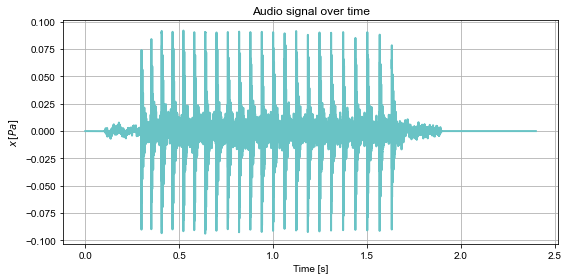

In [5]:
# Plot time signal
woodpecker.signal.plot_2D_Data(
    "time",
    type_plot="curve",
    color_list=COLORS,
)

## Third-octave spectrum

An Audio object is created by importing an audio file. In this example, the signal is imported from a .wav file. 

In [6]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
pink_noise = Audio(
    "../validations/loudness_zwicker/data/ISO_532-1/PinkNoise_40dBpHz@1000Hz.wav",
    calib=2 * 2 ** 0.5,
    is_stationary=False
)

# Compute third-octave spectrum
pink_noise.comp_3oct_spec()


The preceeding command line launched the computation of the third-octave spectrum that is now stored in the woodpecker object. The following command shows how to plot the spectrum. The argument "freqs" indicates the axis along which to plot, and the "time=1" takes the spectrum at 1 second. The optional type_plot argument is obviously used to specifies the plot type (among "curve", "bargraph", "barchart" and "quiver"). The optional color_list argument is used to specify the color scheme used for the plots.

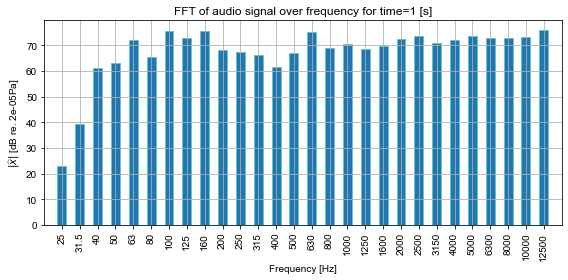

In [10]:
# Plot third-octave spectrum
pink_noise.third_spec.plot_2D_Data(
        "freqs",
        "time=1",
        type_plot="octave",
        is_logscale_x=True,
        x_min=20,
        y_min=0,
        unit="dB",
        color_list=COLORS
    )

## Overall level

An Audio object is created by importing an audio file. In this example, the signal is imported from a .wav file. 

In [8]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
woodpecker = Audio(
    "../validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav",
    calib=2 * 2 ** 0.5,
)


The following command line launches the computation of the overall sound pressure level, with 3 arguments:
 - nb_points: the number of points, i.e. the number of level values,
 - start: the beginning of the time frame of interest (in s)
 - stop: the end of the time frame of interest (in s)

The next command shows how to plot the spectrum.
The argument "time" indicates that the level values should be plotted along the time axis. The optional type_plot argument is obviously used to specifies the plot type (among "curve", "bargraph", "barchart" and "quiver"). The optional color_list argument is used to specify the color scheme used for the plots.

d:\scripts\github_svn\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:424: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


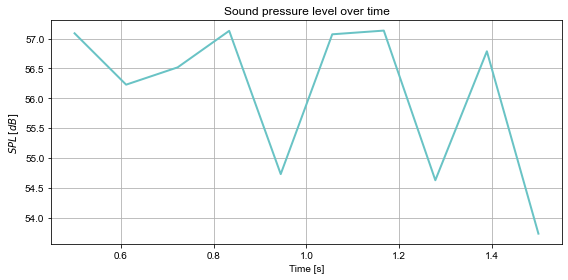

In [9]:
# Compute overall level
woodpecker.compute_level(nb_points=10,start=0.5,stop=1.5)

# Plot SPL
woodpecker.level.plot_2D_Data(
    "time",
    type_plot="curve",
    color_list=COLORS,
)